# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
def ImportData(p):
    try:
        data = pd.read_csv("customers.csv")
        data.drop(['Region', 'Channel'], axis = 1, inplace = True)
        if p:
            print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
        return data
    except:
        print("Dataset could not be loaded. Is the dataset missing?")

/Users/aptroost/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aptroost/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aptroost/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aptroost/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Success - Display the first record
data = ImportData(True)
data.tail(n=3)

Wholesale customers dataset has 440 samples with 6 features each.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125
439,2787,1698,2510,65,477,52


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


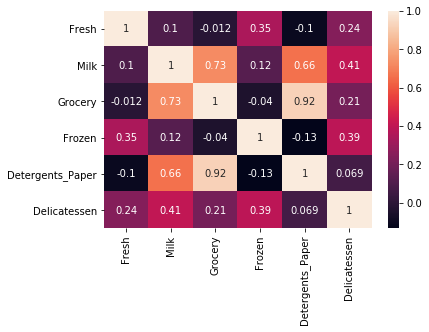

In [4]:
# Computation of correlation matrix of 'data', only for int and floats
cor = data.corr() # Calculate the correlation of the above variables
sns.heatmap(cor, annot=True) # Plot the correlation as heat map

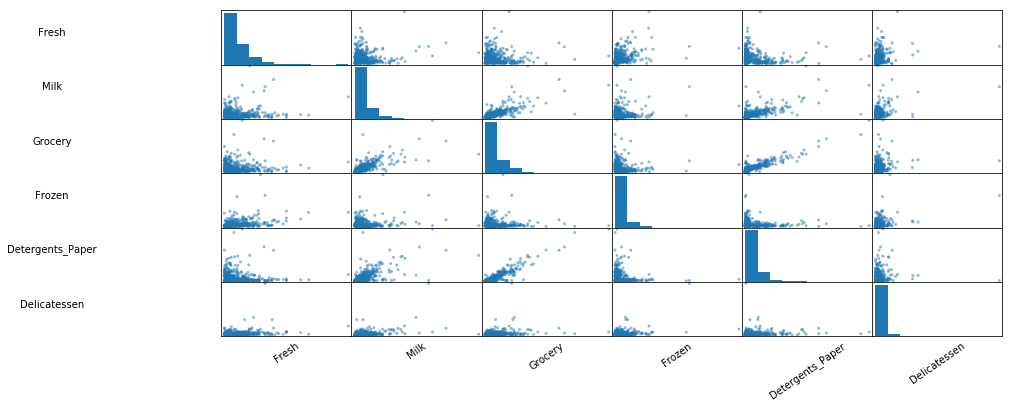

In [5]:
sm = pd.plotting.scatter_matrix(data, figsize=(14, 6))

# Change label rotation
[s.xaxis.label.set_rotation(35) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1.3,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [6]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [10, 46, 378]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys())
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
10,3366,5403,12974,4400,5977,1744
46,3103,14069,21955,1668,6792,1452
378,3225,3294,1902,282,68,1114


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


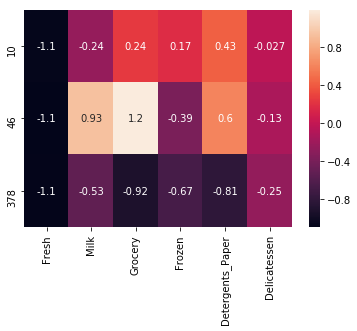

In [7]:
# Three observations relative to max product category spending
sns.heatmap((samples - data.quantile(q=0.75))/data.std(), annot=True)

**Answer:**
- **10** Very little fresh and little milk, while more then avg grocery and frozen, loads of detergent paper and average delicatessen. Looks like a supermarket.
- **46** Very little fresh, loads of milk and grocery, little frozen and high amount of detergents. This can be a bakery or cafe.
- **378** Low of all, but delicatessen and milk reasonable. This can be a small cafe.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [8]:
def FeatureRelevance(feature_names):
    from sklearn.cross_validation import train_test_split
    from sklearn.tree import DecisionTreeRegressor

    for feature_name in feature_names:
        # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
        new_data = ImportData(False) # This method keeps the 'data' dataframe intact
        new_data.drop(feature_name,
                      axis = 1,
                      inplace = True)

        # TODO: Split the data into training and testing sets (0.25) using the given feature as the target
        # Set a random state.
        X_train, X_test, y_train, y_test = train_test_split(new_data,
                                                            data[feature_name],
                                                            random_state = 0,
                                                            test_size = 0.25)

        # TODO: Create a decision tree regressor and fit it to the training set
        regressor = DecisionTreeRegressor(random_state = 30)
        regressor.fit(X_train,
                      y_train)

        # TODO: Report the score of the prediction using the testing set
        score = regressor.score(X_test,
                                y_test)
        round_score = round(score*100, 2)
        print("Feature {} has a R^2 score of {}%.".format(feature_name,
                                                          round_score))

In [9]:
features_names = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
FeatureRelevance(features_names)

Feature Fresh has a R^2 score of -42.79%.
Feature Milk has a R^2 score of 18.74%.
Feature Grocery has a R^2 score of 60.22%.
Feature Frozen has a R^2 score of 24.9%.
Feature Detergents_Paper has a R^2 score of 71.83%.
Feature Delicatessen has a R^2 score of -1292.77%.


/Users/aptroost/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
- Frozen initially, but I wanted to know them all :D
- For Frozen the R^2 was 24.90%
- The feature Frozen scores very low, which confirms the low correlation as visible in the correlation matrix above. The feature Delicatessen and Fresh give negative values, implying that these features are hard to predict. Detergents_paper has a relatively high R^2 score, making us to believe that it is the best predictable feature of this dataset. The Frozen feature can thus be defined as medium necessary to identify customers' spending habits, it carries some information to identify the other features. Thus if removed the other features can medium predict customers' spending habits and the reliability will decrease with an unknown medium amount.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/Users/aptroost/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


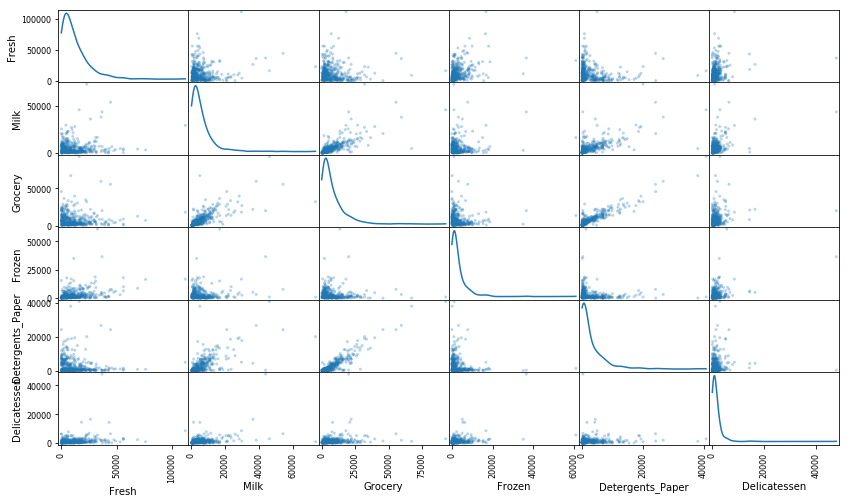

In [10]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html) (the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

- Grocery gives a clear linear correlation with Detergents_paper, with a correlation coeff of 0.92 (as seen above)
- Milk and Detergents_paper are linear correlated with a coefficient of 0.66 as well, but not as strong as Grocery with Detergents_paper
- Milk and Grocery are linearly correlated as well, with a correlation coefficient of 0.73

It was expected that there will be correlation for the features Grocery and Detergents_paper because these scored very well on the R^2 score in Question 2, and they do.

My feature was Frozen and it confirms my suspicion about the irrelevance of this feature.

Low values dominate all features, which gives the idea that the majority of the businesses are small or medium-sized organisations. This skewness needs to be reduced to create a reliable prediction.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/Users/aptroost/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


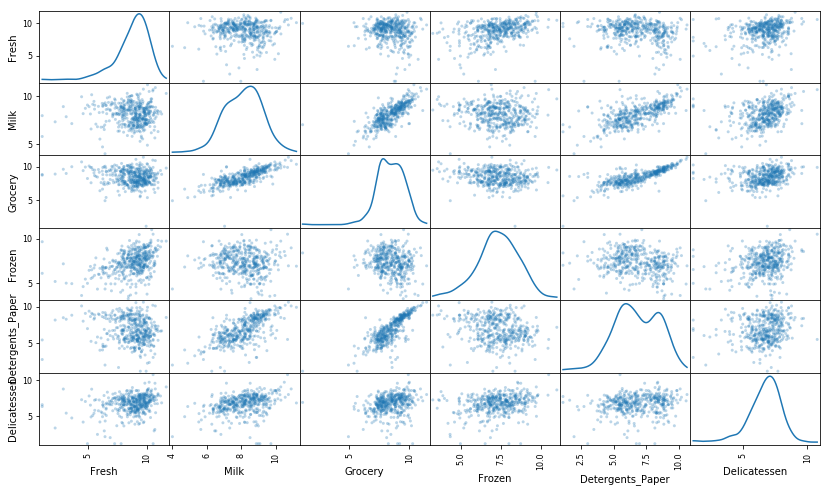

In [11]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [12]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
10,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937
46,8.040125,9.551729,9.996750,7.419381,8.823501,7.280697
378,8.078688,8.099858,7.550661,5.641907,4.219508,7.015712


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
# For each feature find the data points with extreme high or low values
outliers = pd.DataFrame(np.zeros(shape=log_data.shape), columns=log_data.columns)
outlier_list = []
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    round_step = round(step, 3)
    
    # Find the outliers
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    
    # Remove the outliers, if any were specified
    outliers.loc[feature_outliers.index.tolist(), feature] = 1.0
    outlier_list += feature_outliers.index.tolist()

    # Display information
    print("Outlier step is {} for the data points considered outliers of the feature {}".format(round_step,
                                                                                                 feature))

good_data = log_data.drop(log_data.index[outlier_list]).reset_index(drop = True)
print("\nThe total number of outliers including duplicates is {}.".format(len(outliers)))
print("The new dataset with filtered outliers has {} observations with {} features.".format(*good_data.shape))

Outlier step is 2.534 for the data points considered outliers of the feature Fresh
Outlier step is 2.318 for the data points considered outliers of the feature Milk
Outlier step is 2.399 for the data points considered outliers of the feature Grocery
Outlier step is 2.349 for the data points considered outliers of the feature Frozen
Outlier step is 4.089 for the data points considered outliers of the feature Detergents_Paper
Outlier step is 2.242 for the data points considered outliers of the feature Delicatessen

The total number of outliers including duplicates is 440.
The new dataset with filtered outliers has 398 observations with 6 features.


In [14]:
# Multiple feature outliers, feature is an outlier when value is 1.0
outliers[outliers.T.sum().sort_values(ascending = False) > 1.0]

/Users/aptroost/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,1.0,0.0,0.0,1.0,0.0,0.0
66,1.0,0.0,0.0,0.0,0.0,1.0
75,0.0,0.0,1.0,0.0,1.0,0.0
128,1.0,0.0,0.0,0.0,0.0,1.0
154,0.0,1.0,1.0,0.0,0.0,1.0


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
- The table above gives the outliers for more then one feature: [65, 66, 75, 128, 154]
- The data points are labelled outlier when they are very well below the interquartile range. The data points above have multiple features labelled outlier and therefore it is acceptable to remove these from the dataset since they will only negatively influence the prediction.
- All the values in the outlier_list are well below the interquartile range. Therefore they can be defined as very different values then the existing values in the dataset. Therefore these are filtered out.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

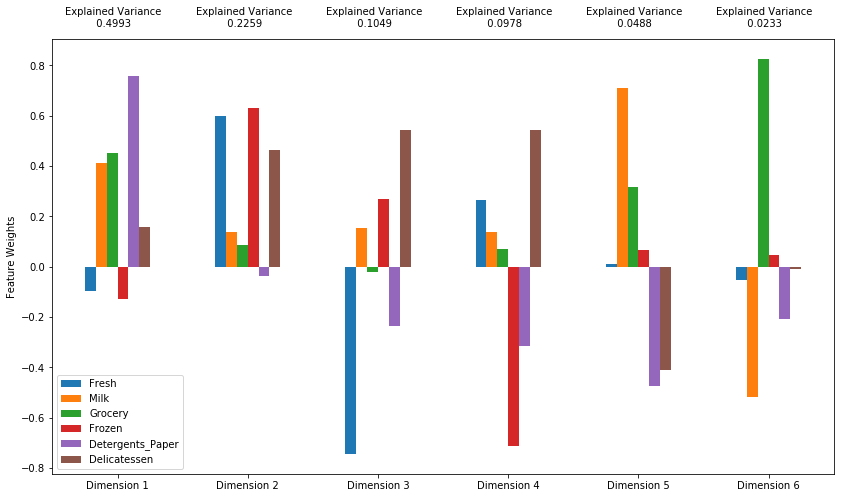

In [15]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = len(features_names))
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension (both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
- The first and second component explain resp. 49.93% and 22.59%, totalling to 72.52% of the variance.
- The first four components explain resp. 49.93%, 22.59%, 10.49% and 9.78%, totalling to 92.79% of the variance.
- All dimensions are described as follows:  
    - Dimension 1. 49.93%, milk, grocery, detergents paper and a bit of delicatessen while badly predicting fresh and frozen. This could be a supermarket or convenience store.  
    - Dimension 2. 22.59%, fresh, frozen, delicatessen and a bit of milk and grocery while badly predicting detergents paper. This could be a restaurant.  
    - Dimension 3, 10.49%, delicatessen, frozen and milk while badly predicting fresh and detergents paper. This could be a small shop.  
    - Dimension 4, 9.78%, delicatessen, fresh and bit of milk and grocery while badly predicting frozen and detergents paper. This could be a coffee shop.  
    - Dimension 5, 4.88%, milk, grocery and a bit of frozen while badly predicting detergents paper and delicatessen. This could be a small supermarket.  
    - Dimension 6, 2.33%, grocery and a bit of frozen while badly predicting milk, detergents paper and fresh. This could be a small supermarket.  

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [16]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.1793,0.5069,0.8243,-1.0031,-0.4516,0.3107
1,3.0101,-0.0669,0.6336,-0.3042,0.3419,0.1840
2,-2.0047,-1.5203,0.8936,1.9098,0.7062,-0.2120


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.128,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.630,-0.0376,0.4634


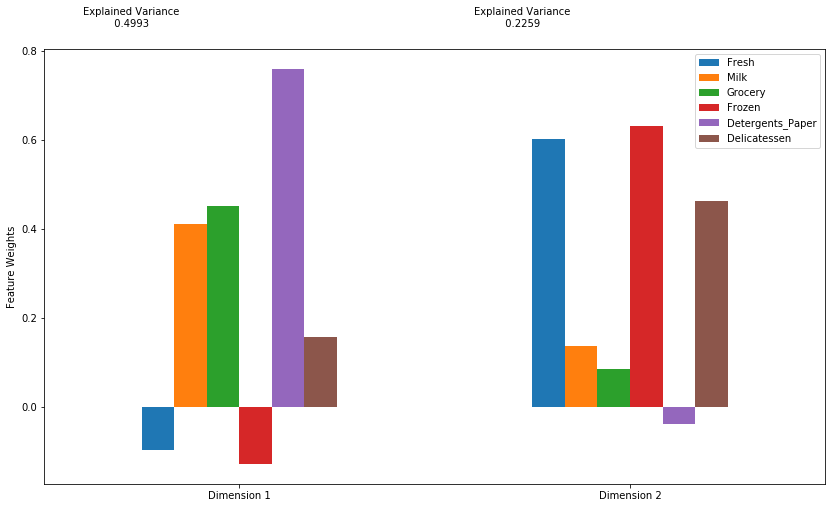

In [17]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1',
                                                     'Dimension 2'])
vs.pca_results(good_data, pca)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [18]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1',
                                                          'Dimension 2']))

,Dimension 1,Dimension 2
0,2.1793,0.5069
1,3.0101,-0.0669
2,-2.0047,-1.5203


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

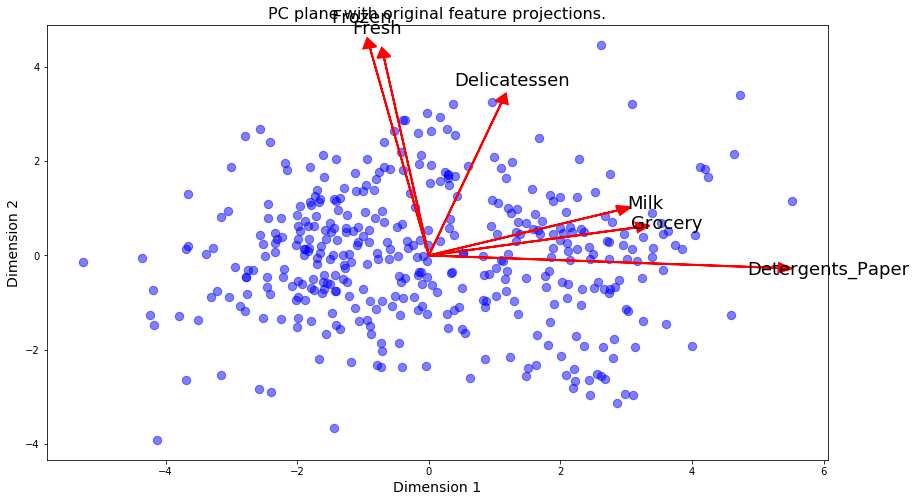

In [19]:
# Create a biplot
vs.biplot(good_data,
          reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
- The advantage of using the K-Means clustering is that it is based on simplicity. It is a traditional clustering algorithm that is very easy to implement, while being very reliable and robust. Besides it performs very well with large amounts of data that have very clear cluster separation.
- The Gaussian Mixture Model clustering algortithm has the advantage that data points can be assigned onto different clusters with a particular probability instead of a discrete value. Besides, it can detect non-sperical clusters, has many parameters and is a soft clustering method.
- The biplot aboves shows that the data are quite uniformly scattered. The clusters are clearly defined, which reduces the possibility of using the K-Means clustering algorithm. Therefore I conclude that the Gaussian Mixture Model is the best to be applied on this dataset.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

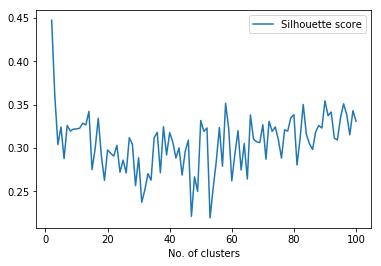

In [20]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

cols = ['No. of clusters', 'Silhouette score']
score_df = pd.DataFrame(columns = cols)
for n in range(100, 1, -1):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components = n).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,
                             preds)

    score_df = score_df.append(pd.Series([n, score], cols), ignore_index=True)
    
score_df.plot(x = cols[0],
              y = cols[1])

In [21]:
score_df.loc[score_df[cols[1]].idxmax()]

No. of clusters     2.000000
Silhouette score    0.447412
Name: 98, dtype: float64

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
- See plot above.
- The silhouette score is the highest with 0.4467 using two clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

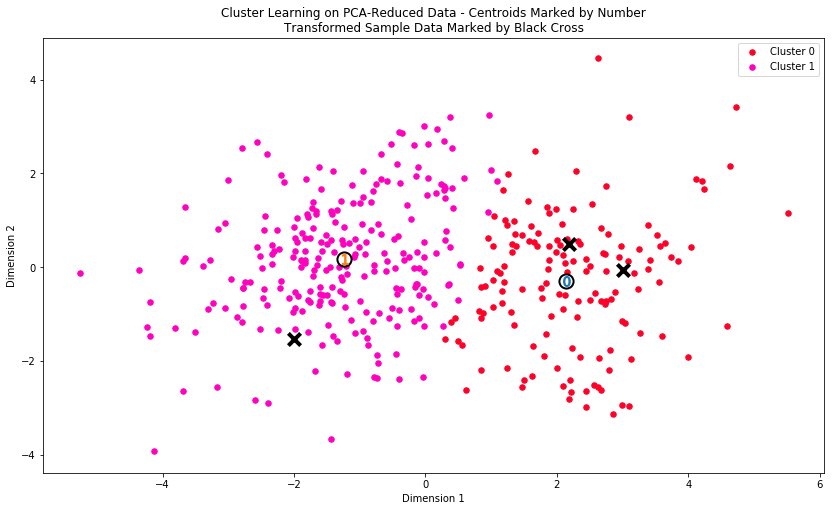

In [22]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [23]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Cluster {}'.format(i) for i in range(0, len(centers))]
true_centers = pd.DataFrame(np.round(true_centers),
                            columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Cluster 0,5174.0,7776.0,11581.0,1068.0,4536.0,1101.0
Cluster 1,9468.0,2067.0,2624.0,2196.0,343.0,799.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

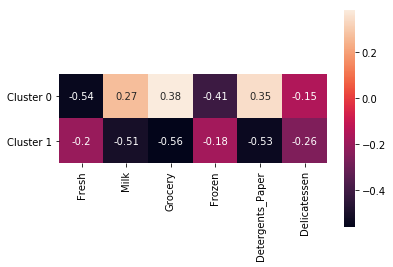

In [24]:
sns.heatmap((true_centers - data.mean())/data.std(),
            annot=True,
            square=True)

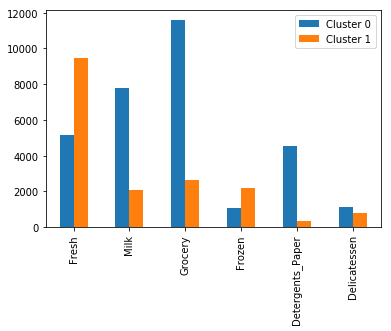

In [25]:
ax = true_centers.T.plot(kind='bar')
plt.show()

**Cluster 0** is highly dominant in grocery, with a lot of milk, fresh and quite some detergents paper. This therefore looks like it represents the category of supermarkets, consistent with the initial comparison in data exploration.  
**Cluster 1** has a very large peak in fresh produce, with quite stable figures for milk, grocery and frozen. It looks like this cluster represents the restaurant industry, which is the same prediction as in the initial data exploration.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [26]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**
- **Sample point 0, index 10** 
    - Initial guess: Supermarket
    - Predicted: Supermarket
    - Consistent: Yes
- **Sample point 1, index 46**
    - Initial guess: Bakery or cafe
    - Predicted: Supermarket
    - Consistent: No
- **Sample point 2, index 378** 
    - Initial guess: Small cafe
    - Predicted: Restaurant
    - Consistent: Yes

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** 
The wholesale distributor would like to know as much as possible from its customers before doing the A/B test. Therefore the distributor benefits when it is being able to determine the type of client it serves, in this case the customer segment Supermarket and Restaurant:
- The Supermarket customer segment could accept 3 days of delivery because preservable items do not require daily delivery. 
- The Restaurant customer segment could want 5 days of delivery because they want a daily meal, coffee or lunch.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
It is possible to use both an unsupervised as supervised learning algorithm. The steps could be as follows:
1. First use an unsupervised learning algorithm, such as gaussian mixture modelling, to determine the amount of clusters. These can be then be stored as the feature 'Customer Segment'.
2. Then using a supervised learning algorithm like a support vector machine - that is very strong with separating different clusters - can be used on the target variable 'Customer Segment'.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

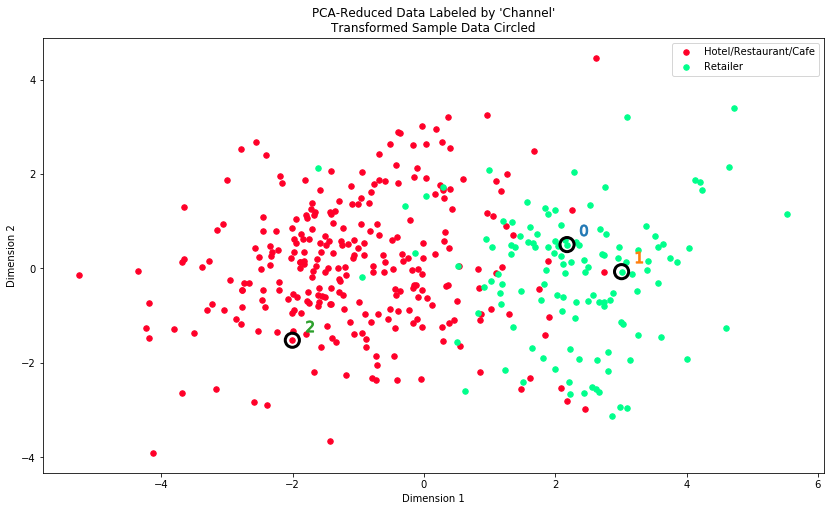

In [27]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outlier_list, pca_samples)

### Question 12

1. How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
2. Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
3. Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

1. According to the visualisation the predicted clusters correlate very well with the customer data. Gaussian Mixture Modeling was only not able to discover extreme outliers.

2. It can be safely concluded that values with a principal component that is very large or very small on the 'Dimension 1' axis are purely in the predicted cluster.

3. Yes, the customer segments 'Restaurant' and 'Supermarket' give a clear definition of the customer segments that have been defined initially.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.